In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\dhruv thakur\OneDrive\Documents\gen ai\advertising_data.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.shape

(200, 4)

In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

AttributeError: module 'matplotlib' has no attribute 'tight_layout'

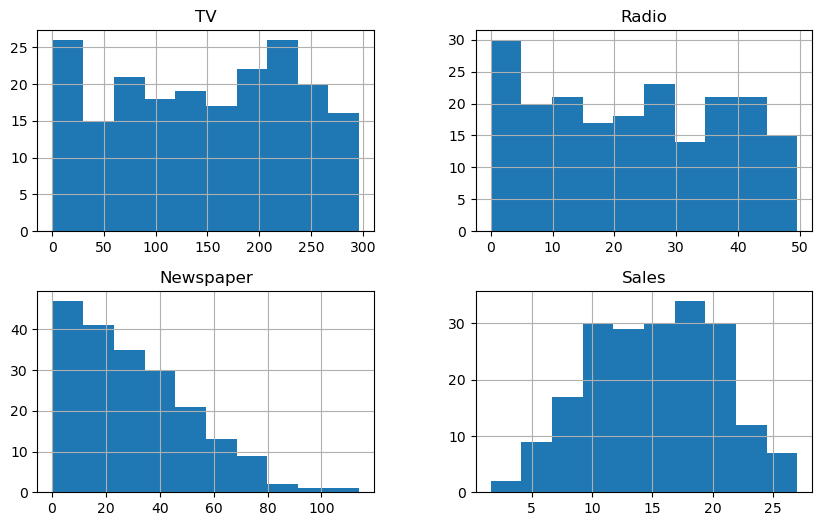

In [9]:
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

In [10]:
for col in df.columns:
    if col != "Sales":
        plt.figure()
        plt.scatter(df[col], df["Sales"])
        plt.xlabel(col)
        plt.ylabel("Sales")
        plt.title(f"{col} vs Sales")
        plt.show()

TypeError: 'module' object is not callable

In [ ]:

import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(5, 3))
    plt.boxplot(df[col], vert=True)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()



In [ ]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return series[(series < lower) | (series > upper)]

for col in df.columns:
    outliers = detect_outliers_iqr(df[col])
    print(f"\nOutliers in {col}:")
    print(outliers)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

corr = df.corr()

plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

print(corr)


In [ ]:
for col in ["TV", "Radio", "Newspaper"]:
    plt.figure(figsize=(5, 3))
    plt.scatter(df[col], df["Sales"])
    plt.xlabel(col)
    plt.ylabel("Sales")
    plt.title(f"{col} vs Sales")
    plt.show()


In [11]:
from sklearn.linear_model import LinearRegression

X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

model = LinearRegression()
model.fit(X, y)

print("Feature importance:")
for col, coef in zip(X.columns, model.coef_):
    print(col, coef)


Feature importance:
TV 0.05444578033757093
Radio 0.10700122823870299
Newspaper 0.0003356579223305978


AttributeError: module 'matplotlib' has no attribute 'tight_layout'

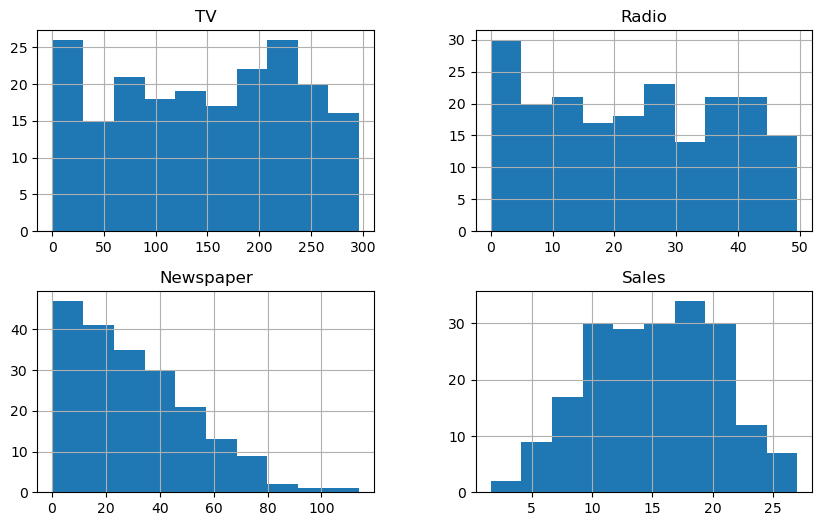

In [12]:
df.hist(figsize=(10,6))
plt.tight_layout()
plt.show()


In [13]:
for col in df.columns:
    plt.figure(figsize=(5,3))
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


TypeError: 'module' object is not callable

In [14]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

for col in df.columns:
    print(f"\nOutliers in {col}:")
    print(detect_outliers_iqr(df[col]))



Outliers in TV:
Series([], Name: TV, dtype: float64)

Outliers in Radio:
Series([], Name: Radio, dtype: float64)

Outliers in Newspaper:
16     114.0
101    100.9
Name: Newspaper, dtype: float64

Outliers in Sales:
Series([], Name: Sales, dtype: float64)


In [15]:
df.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [16]:
corr = df.corr().values
labels = df.columns.tolist()

plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.yticks(np.arange(len(labels)), labels)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


AttributeError: module 'matplotlib' has no attribute 'imshow'

In [17]:
for col in ["TV", "Radio", "Newspaper"]:
    plt.figure(figsize=(5,3))
    plt.scatter(df[col], df["Sales"])
    plt.xlabel(col)
    plt.ylabel("Sales")
    plt.title(f"{col} vs Sales")
    plt.show()


TypeError: 'module' object is not callable

In [18]:
from sklearn.metrics import r2_score

y_pred = model.predict(X)
r2_score(y, y_pred)


0.9025912899684558

In [19]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

importance.sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
1,Radio,0.107001
0,TV,0.054446
2,Newspaper,0.000336


In [20]:
from sklearn.linear_model import LinearRegression

X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

model = LinearRegression()
model.fit(X, y)

print("Coefficients:")
for col, coef in zip(X.columns, model.coef_):
    print(col, coef)

print("Intercept:", model.intercept_)


Coefficients:
TV 0.05444578033757093
Radio 0.10700122823870299
Newspaper 0.0003356579223305978
Intercept: 4.625124078808653


In [21]:
corr = df.corr().values
labels = df.columns.tolist()

plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.yticks(np.arange(len(labels)), labels)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


AttributeError: module 'matplotlib' has no attribute 'imshow'

In [22]:
import pandas as pd

corr = df.corr()

# Pretty table-style heatmap in text form
styled_corr = corr.style.background_gradient(cmap='coolwarm')
styled_corr


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [23]:
import matplotlib.pyplot as plt
print(plt)


<module 'matplotlib.pyplot' from 'C:\\Users\\dhruv thakur\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>


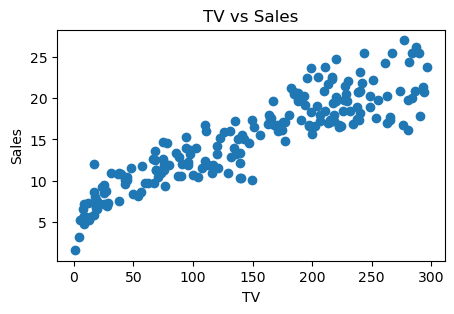

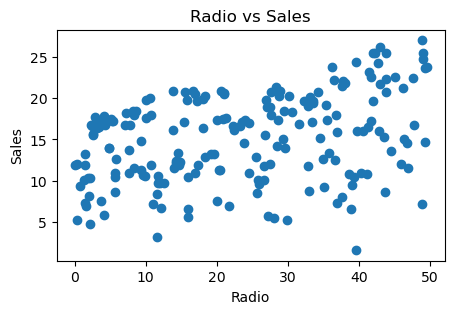

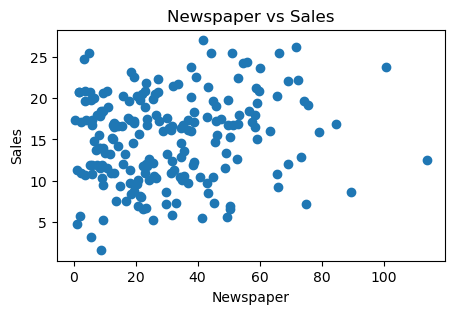

In [25]:
import matplotlib.pyplot as plt

for col in ["TV", "Radio", "Newspaper"]:
    plt.figure(figsize=(5, 3))
    plt.scatter(df[col], df["Sales"])
    plt.xlabel(col)
    plt.ylabel("Sales")
    plt.title(f"{col} vs Sales")
    plt.show()


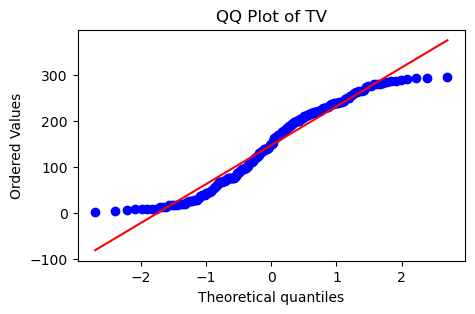

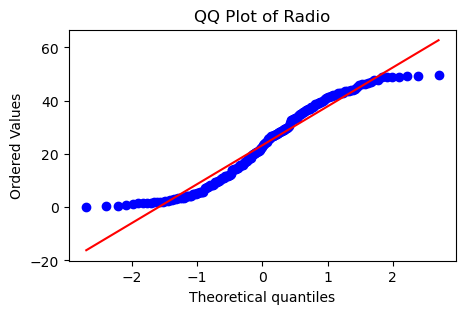

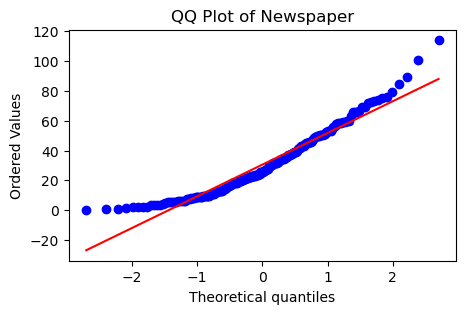

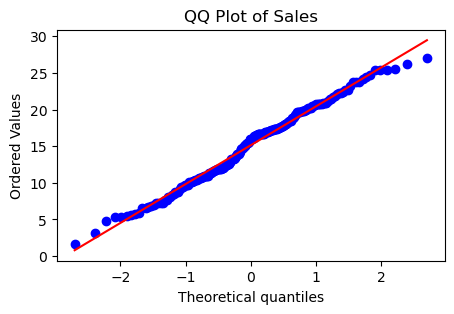

In [26]:
import matplotlib.pyplot as plt
import scipy.stats as stats

for col in df.columns:
    plt.figure(figsize=(5, 3))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"QQ Plot of {col}")
    plt.show()
